In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


INFORMATION OF THE DATASET


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


CHECKING OF DUPLICATE VALUES

In [ ]:
df.duplicated().sum()

3854

REMOVAL OF DUPLICATE VALUES

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

GENDER DISTRIBUTION INFORMATION

<Axes: xlabel='gender', ylabel='count'>

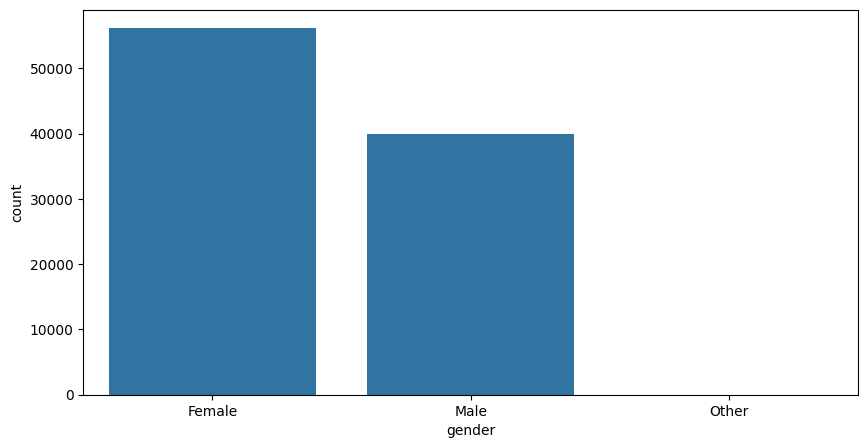

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=df)

DIFFERENT AGE GROUPS HAVING DIABETES

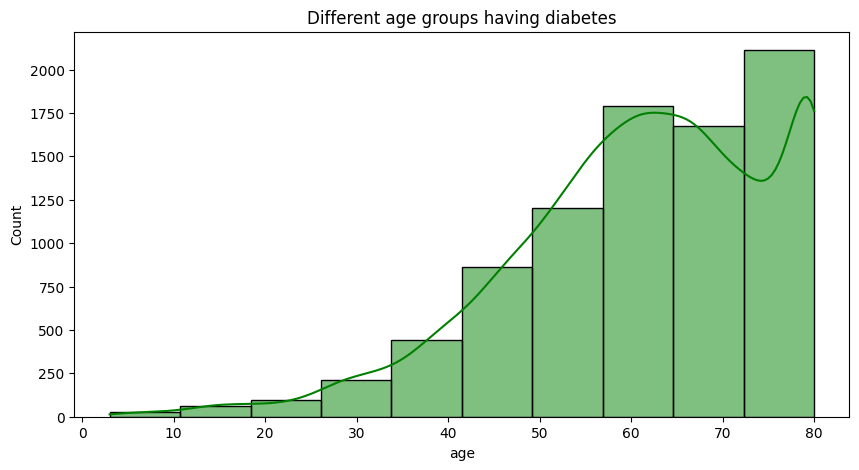

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'][df['diabetes']==1],bins=10,color='green',kde=True)
plt.title('Different age groups having diabetes')
plt.show()

PEOPLE INVOLVED IN SMOKING

In [ ]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


PEOPLE SUFFERING FROM HEART DISEASE

In [ ]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,92223
1,3923


PEOPLE SUFFERING FROM HYPERTENSION

In [ ]:
df['hypertension'].value_counts()

,count
hypertension,
0,88685
1,7461


In [ ]:
df.drop(columns=['hypertension'],inplace=True)

In [ ]:
df.head()

,gender,age,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,1,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0


In [ ]:
x=df.drop(columns=['diabetes'])
y=df['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
train_y = np.nan_to_num(train_y)

In [ ]:
df.head()

,gender,age,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,1,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0


LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Instead of recreating dummy variables, select the relevant columns for your model
x = df[['age','HbA1c_level','blood_glucose_level']]  # Features
y = df['diabetes']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

0.3294808573465473

In [ ]:
model.score(x_test,y_test)

0.33316792290875474

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(x_train,y_train)

0.9571740600135212

In [ ]:
log_reg.score(x_test,y_test)

0.9551742069682787

ACCURACY, PRECISION, RECALL, F1 SCORE, CONFUSION MATRIX

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


evaluate_model(log_reg, x_test, y_test)

Accuracy: 0.9551742069682787
Precision: 0.8731537793223284
Recall: 0.5839628123184195
F1 Score: 0.6998607242339833

Confusion Matrix:
 [[17363   146]
 [  716  1005]]


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train)

0.9720604295595194

In [ ]:
dt.score(x_test, y_test)

0.9682267290691627

ACCURACY, PRECISION, RECALL, F1 SCORE, CONFUSION MATRIX

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


evaluate_model(dt, x_test, y_test)

Accuracy: 0.9682267290691627
Precision: 0.9497568881685575
Recall: 0.6809994189424753
F1 Score: 0.7932318104906937

Confusion Matrix:
 [[17447    62]
 [  549  1172]]


TESTING OF THE MODEL

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Example new patient data (replace with actual values)
new_patient = np.array([[67,6.5,200]])  # Sample feature values

scaler = StandardScaler()
scaler.fit(x_train)

new_patient = scaler.transform(new_patient)

# Predict the outcome
prediction = model.predict(new_patient)
print("Diabetes Prediction:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Diabetes Prediction: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


FOR  MULTIPLE  PATIENTS

In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Example new patient data (replace with actual values)
new_patient = np.array([[70,6.6,140],[73,6.5,200]])  # Sample feature values

scaler = StandardScaler()
scaler.fit(x_train)


# Scale input (if you used scaling)
new_patient = scaler.transform(new_patient)

# Predict the outcome
prediction = model.predict(new_patient)

for i, pred in enumerate(prediction):
    print(f"Patient {i+1}: {'Diabetic' if pred == 1 else 'Non-Diabetic'}")


Patient 1: Non-Diabetic
Patient 2: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
